## Citations

Rollings, A. (2020). mlrose: Machine Learning, Randomized Optimization and SEarch package for Python, hiive extended remix. https://github.com/hiive/mlrose. Accessed: Sept 28, 2020

Hayes, G. (2019). mlrose: Machine Learning, Randomized Optimization and SEarch package for Python. https://github.com/gkhayes/mlrose. Accessed: Sept 28, 2020

(Timer) https://stackoverflow.com/questions/7370801/how-to-measure-elapsed-time-in-python

In [70]:
import mlrose_hiive as mlrose
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import timeit
from sklearn import tree, svm, datasets, metrics, preprocessing
from sklearn.model_selection import train_test_split,StratifiedKFold, ShuffleSplit
from sklearn.model_selection import StratifiedShuffleSplit, cross_validate, GridSearchCV, learning_curve, cross_val_score, validation_curve
from sklearn.metrics import roc_curve, auc, accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import os

In [71]:
def plot_learning_curve(classifier, title, data_X, data_y, cv, n_jobs, ylim):
    
    train_sizes, train_scores, test_scores = learning_curve(classifier, scaled_train_X, train_y, cv, n_jobs=4)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.title(title)
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.ylim(ylim)
    lw = 2
    plt.plot(train_sizes, train_scores_mean, label="Training score", color="darkorange", lw=lw)
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange", lw=lw)
    plt.plot(train_sizes, test_scores_mean, label="Cross-validation score",
             color="navy", lw=lw)
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy", lw=lw)
    plt.legend(loc="best")
    plt.grid()
    plt.show()

## Neural Net

In [72]:
data = pd.read_csv("../data/bank.csv")
data.shape

(11162, 17)

In [73]:
data = data.apply(LabelEncoder().fit_transform)

data_X = data.drop(columns = ['deposit'], axis=1)/256
data_y = data['deposit']
train_X, test_X, train_y, test_y = train_test_split(data_X, data_y, test_size=0.2, random_state=100)

In [74]:
sc = StandardScaler() 
scaled_train_X = sc.fit_transform(train_X)
scaled_test_X = sc.transform(test_X)

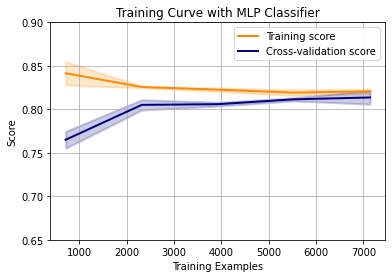

In [75]:
classifier = MLPClassifier(alpha=0.00005, hidden_layer_sizes=(5,), solver='lbfgs', max_iter=100, random_state=18, 
                  early_stopping=True)
title = "Training Curve with MLP Classifier"
plot_learning_curve(classifier, title, scaled_train_X, train_y, cv=None, n_jobs=4, ylim=(0.65, 0.9))

### Random Hill Climb

In [76]:
rhc_nn = mlrose.NeuralNetwork(hidden_nodes=[1], activation='tanh',
                           algorithm = 'random_hill_climb',
                           is_classifier = True, early_stopping = True,
                           max_attempts = 200, max_iters = 5000,
                           bias = True, learning_rate = .5,
                           restarts=0, curve = True, random_state=1)

In [77]:
rhc_nn.fit(train_X, train_y)

NeuralNetwork(activation='tanh', curve=True, early_stopping=True,
              hidden_nodes=[1], learning_rate=0.5, max_attempts=200,
              max_iters=5000, random_state=1)

In [78]:
pred_y = rhc_nn.predict(test_X)
rhc_accuracy = accuracy_score(test_y, pred_y)
pred_y_train = rhc_nn.predict(train_X)
rhc_accuracy_train = accuracy_score(train_y, pred_y_train)
scores = cross_val_score(rhc_nn, data_X, data_y, cv=5)

In [79]:
print(f'Accuracy Scores.  Test: {rhc_accuracy}    Train: {rhc_accuracy_train}')

Accuracy Scores.  Test: 0.7465293327362292    Train: 0.7418523910852279


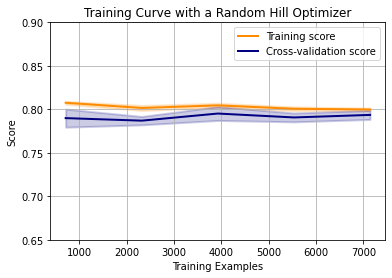

In [80]:
title = "Training Curve with a Random Hill Optimizer"
plot_learning_curve(rhc_nn, title, scaled_train_X, train_y, cv=None, n_jobs=4, ylim=(0.65, 0.9))

### Genetic Algorithm

In [81]:
ga_nn = mlrose.NeuralNetwork(hidden_nodes=[1], activation='tanh',
                           algorithm = 'genetic_alg',
                           is_classifier = True, early_stopping = True,
                           max_attempts = 200, max_iters = 5000,
                           bias = True, learning_rate = .3,
                           restarts=0, curve = True, random_state=1)

In [82]:
ga_nn.fit(train_X, train_y)

NeuralNetwork(activation='tanh', algorithm='genetic_alg', curve=True,
              early_stopping=True, hidden_nodes=[1], learning_rate=0.3,
              max_attempts=200, max_iters=5000, random_state=1)

In [83]:
pred_y = ga_nn.predict(test_X)
ga_accuracy = accuracy_score(test_y, pred_y)
pred_y_train = ga_nn.predict(train_X)
ga_accuracy_train = accuracy_score(train_y, pred_y_train)
scores = cross_val_score(ga_nn, data_X, data_y, cv=5)

In [84]:
print(f'Accuracy Scores.  Test: {ga_accuracy}    Train: {ga_accuracy_train}')

Accuracy Scores.  Test: 0.7554858934169278    Train: 0.7545077836263859


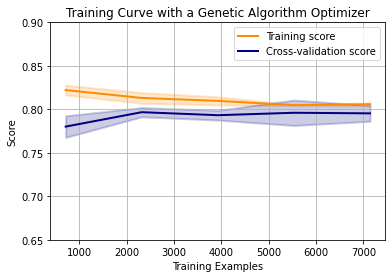

In [85]:
title = "Training Curve with a Genetic Algorithm Optimizer"
plot_learning_curve(ga_nn, title, scaled_train_X, train_y, cv=None, n_jobs=4, ylim=(0.65, 0.9))

### Simulated Annealing

In [86]:
sa_nn = mlrose.NeuralNetwork(hidden_nodes=[1], activation='tanh',
                           algorithm = 'simulated_annealing',
                           is_classifier = True, early_stopping = True,
                           max_attempts = 200, max_iters = 5000,
                           bias = True, learning_rate = .5,
                           restarts=0, curve = True, random_state=1)

In [87]:
sa_nn.fit(train_X, train_y)

NeuralNetwork(activation='tanh', algorithm='simulated_annealing', curve=True,
              early_stopping=True, hidden_nodes=[1], learning_rate=0.5,
              max_attempts=200, max_iters=5000, random_state=1)

In [88]:
pred_y = sa_nn.predict(test_X)
sa_accuracy = accuracy_score(test_y, pred_y)
pred_y_train = sa_nn.predict(train_X)
sa_accuracy_train = accuracy_score(train_y, pred_y_train)
scores = cross_val_score(sa_nn, data_X, data_y, cv=5)

In [89]:
print(f'Accuracy Scores.  Test: {sa_accuracy}    Train: {sa_accuracy_train}')

Accuracy Scores.  Test: 0.7657859381997313    Train: 0.7443162728189047


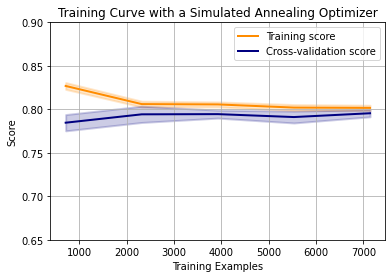

In [90]:
title = "Training Curve with a Simulated Annealing Optimizer"
plot_learning_curve(sa_nn, title, scaled_train_X, train_y, cv=None, n_jobs=4, ylim=(0.65, 0.9))